In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

The dataset comes from one of the leading apartment rental websites.
The data contains 29 columns with one predictor variable (log_price).  

Column descriptions:
- id - identifier
- log_price - logarithmic price of the apartment (target variable)
- property_type - property type
- room_type - type of room
- amenities - available amenities
- accomodates - number of persons
- bathrooms - number of bathrooms 
- bed_type - type of bed
- cancellaion_policy - cancellation policy
- cleaning_fee - cleaning fee
- city - city
- description - description of the apartment
- first_review - date of first review
- host_has_profile_picture - whether the apartment owner has a profile picture
- host_identity_verification - whether the host is verified
- host_response_rate - how often the host responds to requests
- host_since - since when does the owner provide access to the apartment
- instant_bookable - whether the apartment is available for booking immediately
- last_review - date of last review
- latitude - latitude of the building
- longitude - longitude of the building
- name - the name of the apartment offer
- neighbourhood - district/neighbourhood where the apartment is located
- number_of_reviews - the number of reviews
- review_scores_rate - users rating
- thumbnail_url - link to the thumbnail of the host
- zipcode - zip code
- bedrooms - the number of bedrooms
- beds - number of beds

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


[]

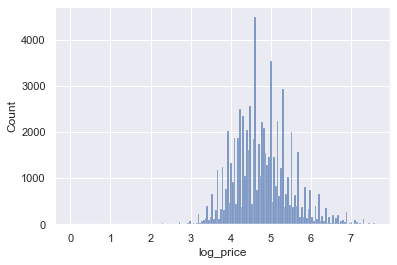

In [7]:
sns.histplot(df['log_price'])
plt.plot()

In [110]:
numeric_columns = df.select_dtypes('number').columns.to_list()
categorical_columns = df.select_dtypes('object').columns.to_list()

In [111]:
numeric_columns

['id',
 'log_price',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [112]:
categorical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

## Pearson

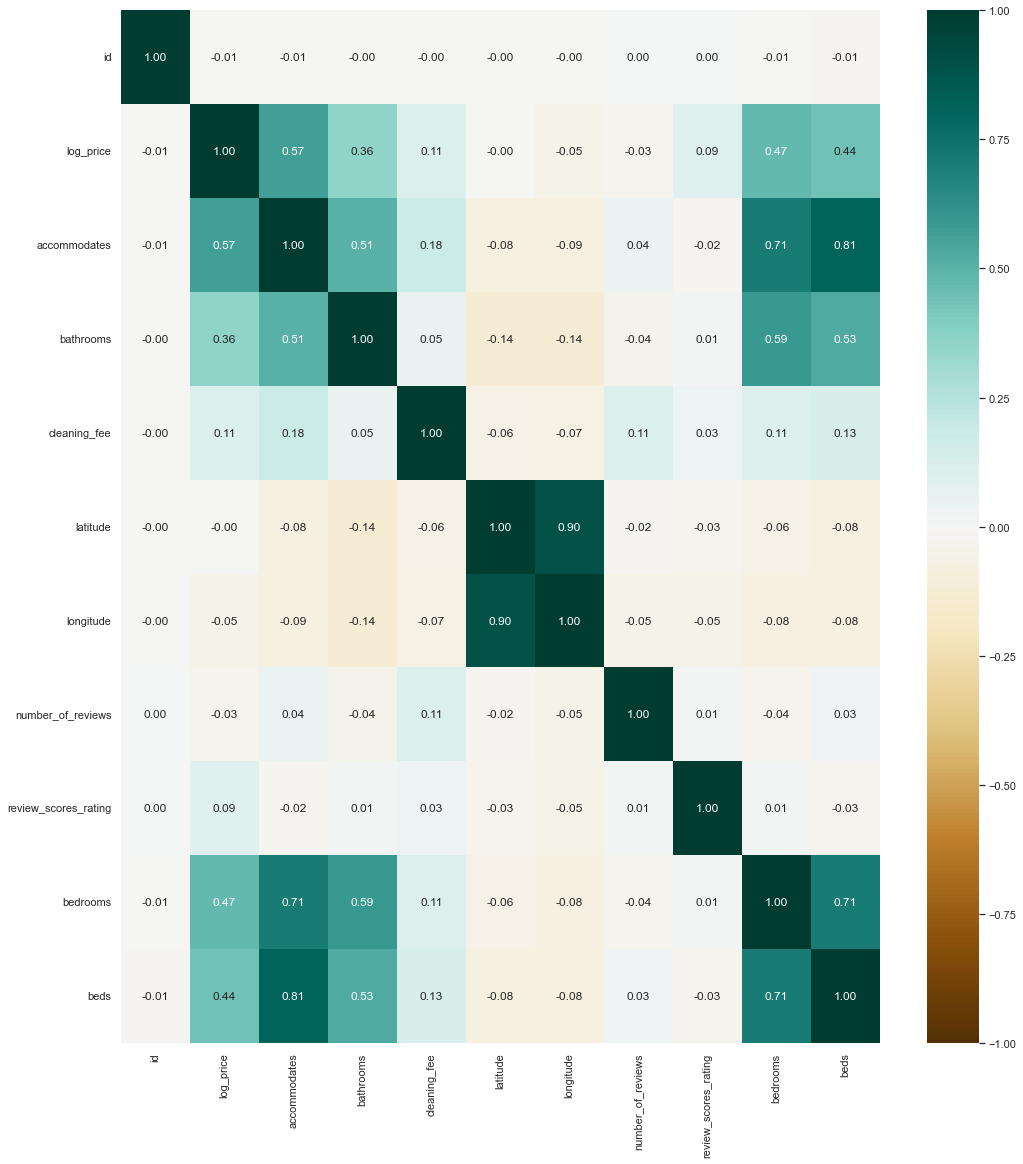

In [11]:
plt.figure(figsize=(17, 19))
heatmap = sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt=".2f")
plt.show()

## Spearman

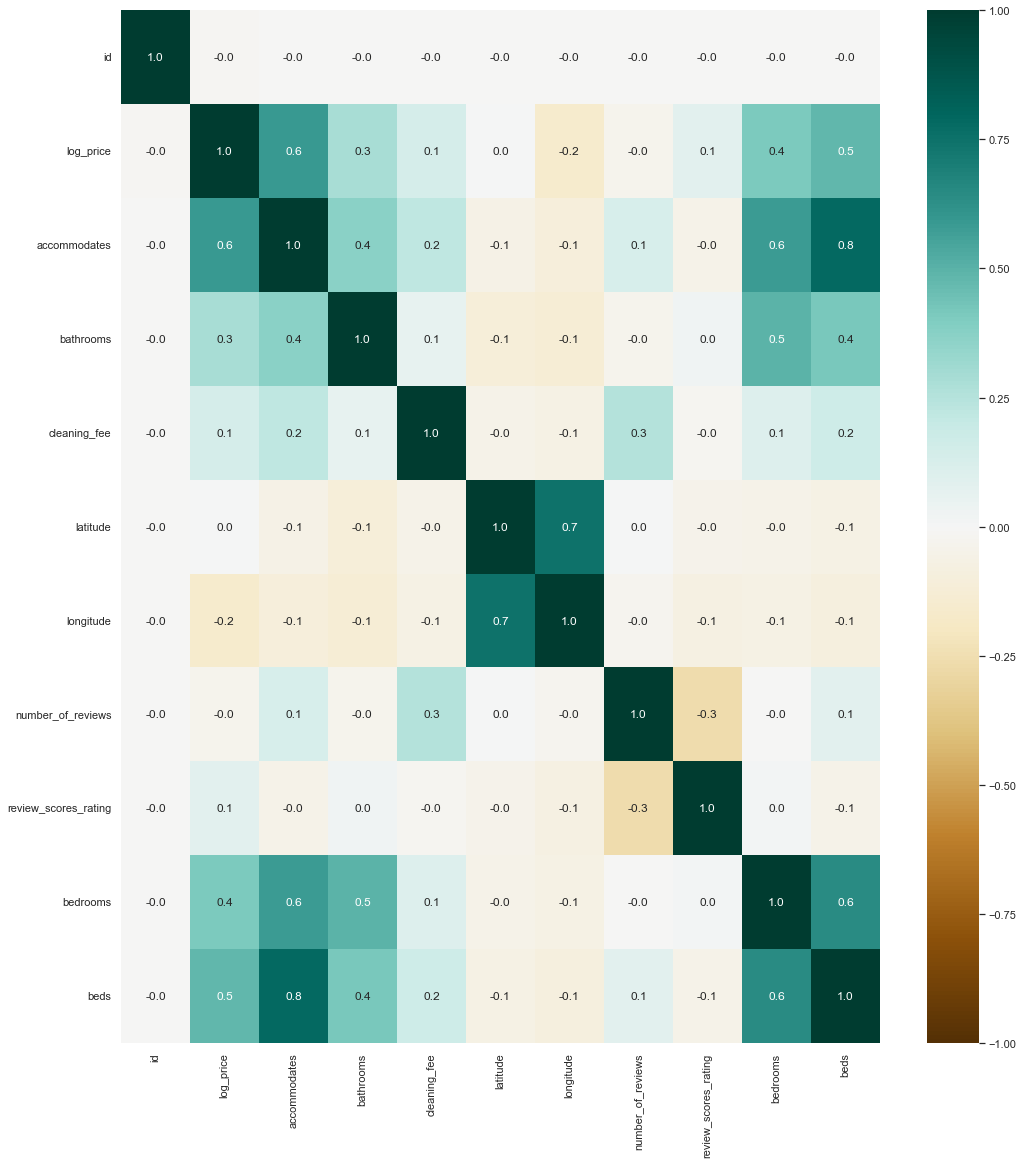

In [12]:
plt.figure(figsize=(17, 19))
heatmap = sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt=".1f")
plt.show()

## Różnica Spearman - Pearson

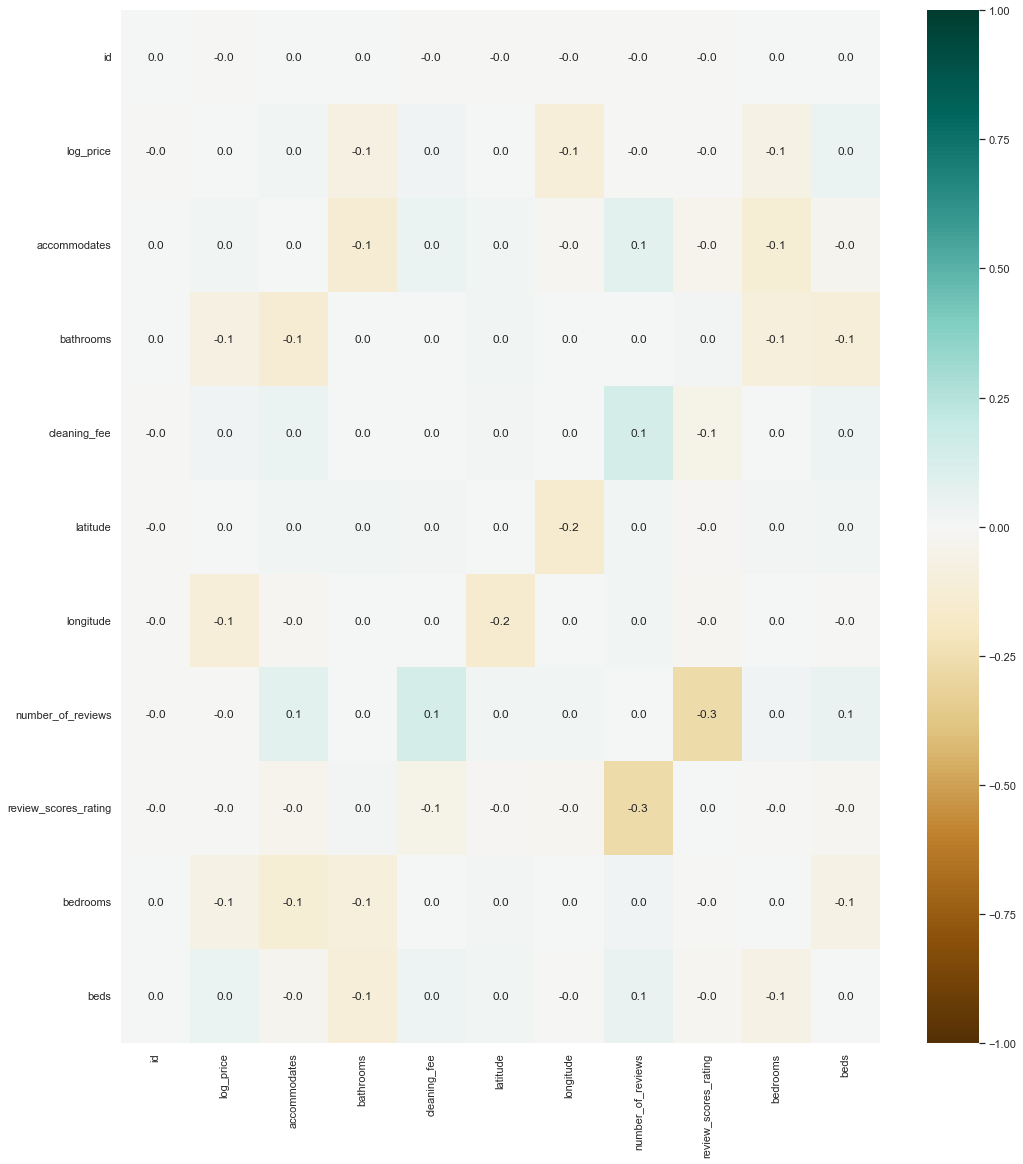

In [13]:
plt.figure(figsize=(17, 19))
heatmap = sns.heatmap(df.corr(method='spearman') - df.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt=".1f")
plt.show()

In [14]:
correlated = df.corr()['log_price']
correlated = correlated[abs(correlated) > 0.3]
# correlated = correlated.drop('log_price')
correlated

log_price       1.000000
accommodates    0.567574
bathrooms       0.355420
bedrooms        0.473212
beds            0.442153
Name: log_price, dtype: float64

In [15]:
def make_pair_grid_plot(data, columns, size=(10, 10)):
    grid = sns.PairGrid(data, vars=columns)
    grid = grid.map_upper(sns.kdeplot, fill=True, thresh=0.05)
    grid = grid.map_diag(sns.histplot)
    grid = grid.map_lower(sns.scatterplot, edgecolor='k')

    grid.fig.tight_layout()

    grid.fig.set_size_inches(size[0], size[1])

    plt.subplots_adjust(top=0.9)
    plt.show()

In [16]:
df.shape

(74111, 29)

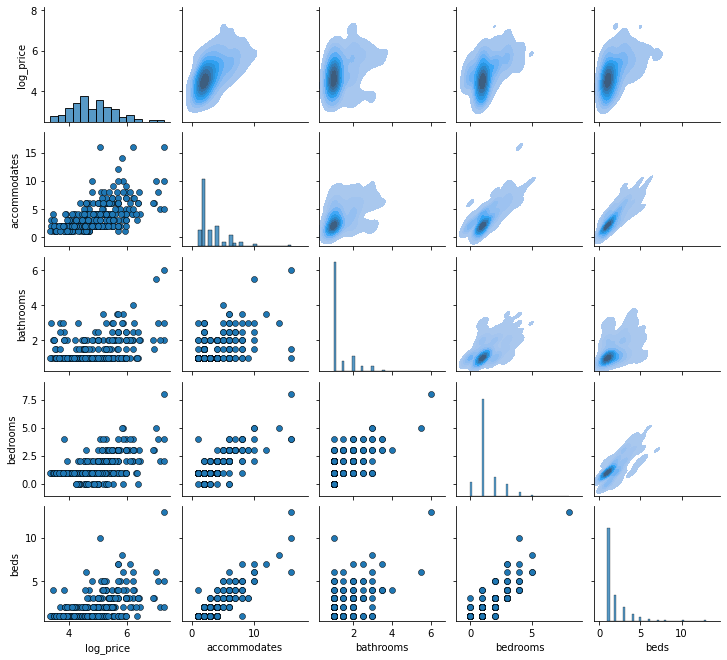

In [20]:
# zamula
make_pair_grid_plot(df.sample(frac=0.005, random_state=710), correlated.index)

In [145]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import itertools
from collections import Counter
import re

In [18]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=710)

In [19]:
X_train = train_df.drop(columns=['log_price'])
y_train = train_df['log_price']

X_test = test_df.drop(columns=['log_price'])
y_test = test_df['log_price']

In [21]:
df[categorical_columns]

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,Beautiful Flat in the Heart of SF!,Lower Haight,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,Great studio in midtown DC,Columbia Heights,NaN,20009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,Apartment,Private room,{},Real Bed,flexible,NYC,one room in bushwick apt,NaN,t,t,NaN,2013-03-24,f,NaN,one room bushwick,Williamsburg,https://a0.muscache.com/im/pictures/55162426/6...,11206.0
74107,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,moderate,LA,"Located on the Pacific Coast Highway, this apa...",2016-08-15,t,f,100%,2016-05-03,f,2017-04-15,Spacious Hermosa 2 BR on PCH,Hermosa Beach,https://a0.muscache.com/im/pictures/2b86560b-a...,90254
74108,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,NYC,A modern apartment located in East Williamsbur...,2015-01-03,t,t,100%,2012-01-05,t,2017-09-10,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0
74109,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,strict,NYC,"Fully renovated, designer's studio located in ...",NaN,t,f,100%,2017-09-17,t,NaN,Designer's Apartment in HEART of NYC,West Village,https://a0.muscache.com/im/pictures/b3971b63-0...,10011


In [125]:
df['neighbourhood'].unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [47]:
binary_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

In [117]:
class BinaryEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_ = np.where(X_ == 't', 1, 0)
        return X_

In [50]:
BinaryEncoder().transform(df[binary_cols]).shape

(74111, 3)

In [66]:
date_cols = ['first_review', 'host_since', 'last_review']

In [118]:
class DaysSinceEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_ = pd.DataFrame(X_) # gdyby wejście było z numpy
        X_ = X_.apply(pd.to_datetime)
        delta = datetime.now() - X_
        days_since = delta.apply(lambda col: col.dt.days)
        days_since = days_since.fillna(days_since.max())
        return days_since

In [109]:
DaysSinceEncoder().transform(df[date_cols])

,first_review,host_since,last_review
0,2149.0,3694.0,2119.0
1,1736.0,1783.0,1687.0
2,1833.0,2020.0,1696.0
3,4919.0,2575.0,4854.0
4,2552.0,2624.0,1931.0
...,...,...,...
74106,4919.0,3331.0,4854.0
74107,2091.0,2195.0,1848.0
74108,2681.0,3775.0,1700.0
74109,4919.0,1693.0,4854.0


In [143]:
class PercentToNumberEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_ = pd.DataFrame(X_) # gdyby wejście było z numpy
        X_ = X_.apply(lambda col: col.str.rstrip('%'))
        X_ = X_.astype(int)
        return X_

In [144]:
percent_cols = ['host_response_rate']

In [142]:
PercentToNumberEncoder().transform(df[['host_response_rate']])

0          0
1        100
2        100
3          0
4        100
        ... 
74106      0
74107    100
74108    100
74109    100
74110    100
Name: host_response_rate, Length: 74111, dtype: int32

In [146]:
amenities_cols = ['amenities']

In [170]:
list(df[amenities_cols])

['amenities']

In [174]:
class AmenitiesEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        def replacespaces(s):
            s = re.sub(r"[^\w\s]", '', s)
            s = re.sub(r"\s+", '-', s)
            return s
        
        l = list(X.iloc[0])
        l = [[word.strip('[" ]') for word in row[1:-1].split(',')] for row in l]
        lst = list(itertools.chain.from_iterable(l))
        final = Counter(lst)
        final = final.most_common(35)

        amenities_list = [el for el, _ in final]

        tmp = pd.DataFrame()
        for el in amenities_list:
            tmp[el] = df['amenities'].str.contains(el).astype(int)
            
        cols = [replacespaces(col) for col in tmp.columns]
        tmp.columns = cols
        
        return tmp

In [186]:
numeric_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scale', StandardScaler())
])

In [187]:
binary_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='f')),
    ('encode', BinaryEncoder())
])

In [190]:
percent_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('encode', PercentToNumberEncoder())
])

In [191]:
column_transformer = ColumnTransformer(
    [('numeric', numeric_pipe, numeric_columns),
     ('binary', binary_pipe, binary_cols),
     ('date', DaysSinceEncoder(), date_cols), # missing values are handled inside encoder
     ('precent', percent_pipe, percent_cols),
     ('amenities', AmenitiesEncoder(), amenities_cols)],
    remainder='passthrough'
)

In [182]:
from sklearn.impute import SimpleImputer

In [192]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(df[numeric_columns])

array([[6.90125700e+06, 5.01063529e+00, 3.00000000e+00, ...,
        1.00000000e+02, 1.00000000e+00, 1.00000000e+00],
       [6.30492800e+06, 5.12989871e+00, 7.00000000e+00, ...,
        9.30000000e+01, 3.00000000e+00, 3.00000000e+00],
       [7.91940000e+06, 4.97673374e+00, 5.00000000e+00, ...,
        9.20000000e+01, 1.00000000e+00, 3.00000000e+00],
       ...,
       [1.86880390e+07, 5.22035583e+00, 5.00000000e+00, ...,
        9.40000000e+01, 2.00000000e+00, 2.00000000e+00],
       [1.70459480e+07, 5.27299956e+00, 2.00000000e+00, ...,
        9.40673648e+01, 0.00000000e+00, 2.00000000e+00],
       [3.53484500e+06, 4.85203026e+00, 4.00000000e+00, ...,
        9.60000000e+01, 1.00000000e+00, 2.00000000e+00]])

In [189]:
column_transformer.fit_transform(df)

array([[-0.7177868873686474, 0.3186084585552589, -0.07204100191520402,
        ..., 'Brooklyn Heights',
        'https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small',
        '11201'],
       [-0.8158399979277673, 0.4848549859679709, 1.7853361742676734, ...,
        "Hell's Kitchen",
        'https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small',
        '10019'],
       [-0.5503757969403871, 0.27135159470788645, 0.8566475861762347,
        ..., 'Harlem',
        'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small',
        '10027'],
       ...,
       [1.2202886356769278, 0.6109471300540997, 0.8566475861762347, ...,
        'Williamsburg',
        'https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small',
        '11206.0'],
       [0.9502831011965723, 0.6843295453941759, -0.5363852959609234, ...,
        'West Village',
  